<a href="https://colab.research.google.com/github/fathifazz/CODSOFT_DATASCIENCE/blob/main/TASK_5%20-%20CREDIT_CARD_FRAUD_DETECTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#INFO ABOUT DATASET

In [2]:
df = pd.read_csv("creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7973 entries, 0 to 7972
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    7973 non-null   int64  
 1   V1      7973 non-null   float64
 2   V2      7973 non-null   float64
 3   V3      7973 non-null   float64
 4   V4      7973 non-null   float64
 5   V5      7973 non-null   float64
 6   V6      7973 non-null   float64
 7   V7      7973 non-null   float64
 8   V8      7973 non-null   float64
 9   V9      7973 non-null   float64
 10  V10     7973 non-null   float64
 11  V11     7973 non-null   float64
 12  V12     7973 non-null   float64
 13  V13     7973 non-null   float64
 14  V14     7973 non-null   float64
 15  V15     7972 non-null   float64
 16  V16     7972 non-null   float64
 17  V17     7972 non-null   float64
 18  V18     7972 non-null   float64
 19  V19     7972 non-null   float64
 20  V20     7972 non-null   float64
 21  V21     7972 non-null   float64
 22  

In [4]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       1
V16       1
V17       1
V18       1
V19       1
V20       1
V21       1
V22       1
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64

In [5]:
df.duplicated().sum()

39

In [6]:
df.drop_duplicates(inplace=True)

In [7]:
df.duplicated().sum()

0

#CALCULATING LEGIT AND FAKE TRANSACTIONS

In [8]:
df['Class'].value_counts()

Class
0.0    7908
1.0      25
Name: count, dtype: int64

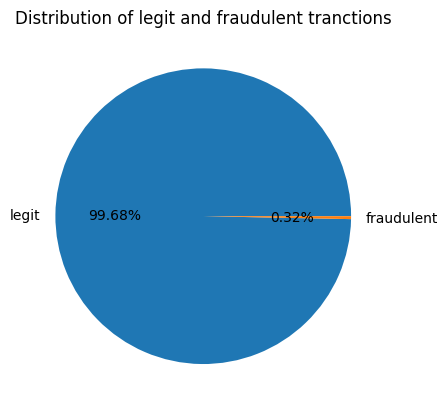

In [9]:
df['Class'].value_counts().plot(kind='pie',autopct="%1.2f%%",labels=['legit','fraudulent'])
plt.ylabel("")
plt.title("Distribution of legit and fraudulent tranctions")
plt.show()

#SEPERATING DATA

In [10]:
fraud = df[df['Class']==1]
legit = df[df['Class']==0]

In [11]:
legit

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7967,10980,-0.046786,0.030050,2.037794,-0.670130,-0.727283,-0.588537,-0.067966,-0.370767,0.228931,...,0.264364,1.078896,-0.097768,0.375679,-0.500253,-0.159051,-0.018267,-0.061794,39.00,0.0
7968,10980,1.284388,-0.013181,0.646174,0.198985,-0.568675,-0.526121,-0.448235,-0.167709,1.773223,...,-0.101868,-0.030298,-0.081412,-0.123281,0.278808,1.064001,-0.090181,0.000481,15.95,0.0
7969,10981,1.190428,-0.122329,0.954945,0.267101,-0.971026,-0.652279,-0.612992,-0.003909,1.633117,...,-0.015001,0.127027,0.012079,0.534409,0.112179,1.004483,-0.100188,-0.004774,14.95,0.0
7970,10981,-0.725175,0.298202,1.824761,-2.587170,0.283605,-0.016617,0.153659,0.045084,-0.197611,...,-0.017097,-0.070535,-0.442861,-0.895837,0.624743,-0.510601,-0.031142,0.025564,12.95,0.0


In [12]:
fraud

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,406,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1.0
623,472,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1.0
4920,4462,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1.0
6108,6986,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1.0
6329,7519,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1.0
6331,7526,0.008430,4.137837,-6.240697,6.675732,0.768307,-3.353060,-1.631735,0.154612,-2.795892,...,0.364514,-0.608057,-0.539528,0.128940,1.488481,0.507963,0.735822,0.513574,1.00,1.0
6334,7535,0.026779,4.132464,-6.560600,6.348557,1.329666,-2.513479,-1.689102,0.303253,-3.139409,...,0.370509,-0.576752,-0.669605,-0.759908,1.605056,0.540675,0.737040,0.496699,1.00,1.0
6336,7543,0.329594,3.712889,-5.775935,6.078266,1.667359,-2.420168,-0.812891,0.133080,-2.214311,...,0.156617,-0.652450,-0.551572,-0.716522,1.415717,0.555265,0.530507,0.404474,1.00,1.0
6338,7551,0.316459,3.809076,-5.615159,6.047445,1.554026,-2.651353,-0.746579,0.055586,-2.678679,...,0.208828,-0.511747,-0.583813,-0.219845,1.474753,0.491192,0.518868,0.402528,1.00,1.0
6427,7610,0.725646,2.300894,-5.329976,4.007683,-1.730411,-1.732193,-3.968593,1.063728,-0.486097,...,0.589669,0.109541,0.601045,-0.364700,-1.843078,0.351909,0.594550,0.099372,1.00,1.0


In [13]:
legit.Amount.describe()

count    7908.000000
mean       65.503786
std       194.564467
min         0.000000
25%         4.785000
50%        15.980000
75%        55.000000
max      7712.430000
Name: Amount, dtype: float64

In [14]:
fraud.Amount.describe()

count      25.000000
mean      106.308400
std       372.676883
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max      1809.680000
Name: Amount, dtype: float64

#COMPARING BOTH TRANSACTIONS

In [15]:
df.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0.0,4255.237607,-0.292877,0.283367,0.918021,0.199225,-0.022965,0.160630,-0.017876,-0.072530,0.661942,...,0.043004,-0.057508,-0.163764,-0.035178,0.028443,0.088566,0.020210,0.015313,0.000643,65.503786
1.0,7359.240000,-1.154048,2.930880,-4.757618,4.590240,-0.636103,-1.952536,-2.202403,0.647916,-1.581984,...,0.263011,0.393614,-0.265715,-0.116502,-0.183413,0.067479,0.256994,0.421586,0.237600,106.308400


#UNDERSAMPLING

In [16]:
legit_sample = legit.sample(n=473)

#CONCATENATING DATASETS

In [17]:
new_df = pd.concat([legit_sample,fraud],axis=0)
new_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
6474,7741,-0.878740,1.752149,1.378459,2.922510,0.237755,0.362943,0.611105,0.414431,-1.180265,...,0.061773,0.209308,-0.146891,0.175128,0.319390,0.314884,-0.108070,-0.001665,53.73,0.0
1385,1074,-0.295594,1.022747,1.534593,-0.189536,0.417759,-0.545109,0.998968,-0.327714,-0.409308,...,-0.293893,-0.556324,-0.123407,-0.099532,-0.108294,0.069227,0.107248,-0.103839,8.97,0.0
4822,4311,-3.558423,0.837723,1.848554,2.957367,0.575207,2.004601,-3.051626,-5.333467,0.885358,...,4.948529,-1.311933,-0.813346,-0.803475,0.059968,0.517540,1.193959,-0.219442,164.72,0.0
6705,8352,1.320528,0.071856,0.174214,-0.171412,-0.106575,-0.323060,-0.250879,-0.106013,1.365668,...,-0.266599,-0.540413,-0.053197,-0.503784,0.290989,0.956847,-0.116417,-0.022166,0.77,0.0
3942,3552,0.800782,-0.680316,0.159962,1.287435,-0.301997,0.581568,-0.105455,0.166531,0.665547,...,0.061975,-0.174980,-0.322029,-0.904035,0.496237,-0.266727,0.012387,0.051016,220.45,0.0


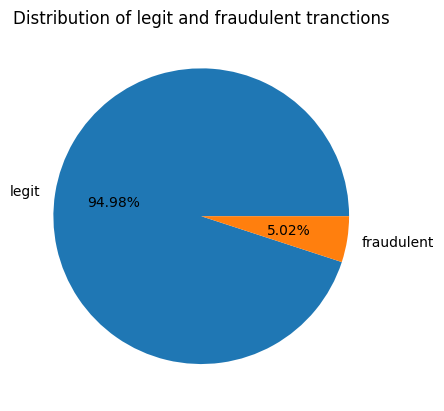

In [18]:
new_df['Class'].value_counts().plot(kind='pie',autopct="%1.2f%%",labels=['legit','fraudulent'])
plt.ylabel("")
plt.title("Distribution of legit and fraudulent tranctions")
plt.show()

In [19]:
df.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0.0,4255.237607,-0.292877,0.283367,0.918021,0.199225,-0.022965,0.160630,-0.017876,-0.072530,0.661942,...,0.043004,-0.057508,-0.163764,-0.035178,0.028443,0.088566,0.020210,0.015313,0.000643,65.503786
1.0,7359.240000,-1.154048,2.930880,-4.757618,4.590240,-0.636103,-1.952536,-2.202403,0.647916,-1.581984,...,0.263011,0.393614,-0.265715,-0.116502,-0.183413,0.067479,0.256994,0.421586,0.237600,106.308400


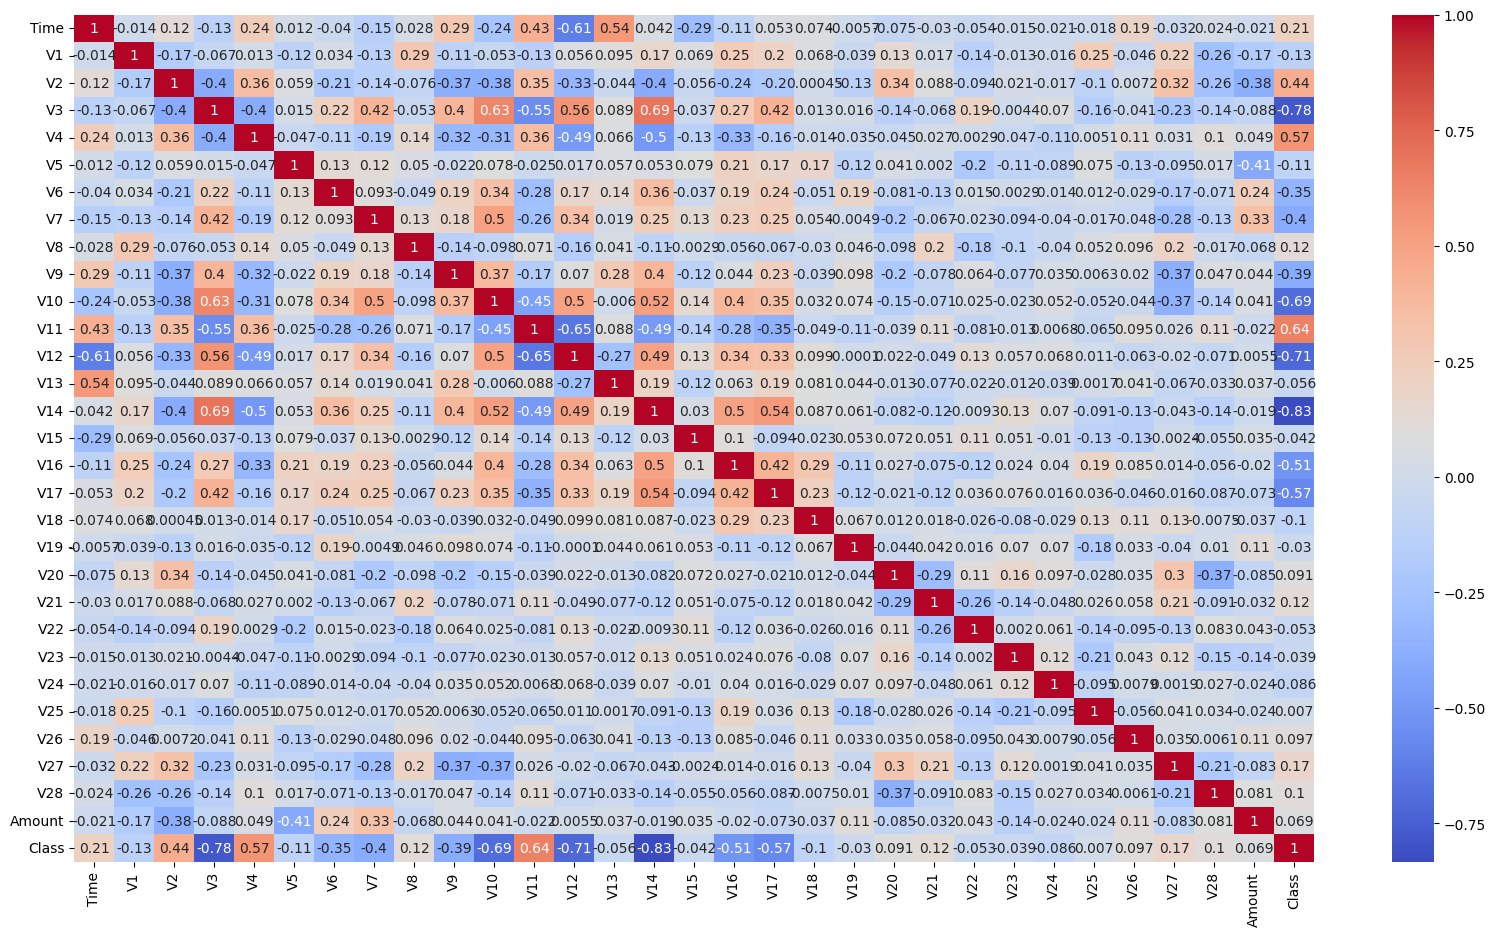

In [20]:
plt.figure(figsize=(20,11))
sns.heatmap(new_df.corr(), cmap = 'coolwarm', annot= True )
plt.show()

#SPLITTING DATA INTO FEATURES AND TARGET

In [21]:
x = new_df.drop(columns='Class',axis=1)
y = new_df['Class']
x

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
6474,7741,-0.878740,1.752149,1.378459,2.922510,0.237755,0.362943,0.611105,0.414431,-1.180265,...,0.071277,0.061773,0.209308,-0.146891,0.175128,0.319390,0.314884,-0.108070,-0.001665,53.73
1385,1074,-0.295594,1.022747,1.534593,-0.189536,0.417759,-0.545109,0.998968,-0.327714,-0.409308,...,0.280125,-0.293893,-0.556324,-0.123407,-0.099532,-0.108294,0.069227,0.107248,-0.103839,8.97
4822,4311,-3.558423,0.837723,1.848554,2.957367,0.575207,2.004601,-3.051626,-5.333467,0.885358,...,-2.452222,4.948529,-1.311933,-0.813346,-0.803475,0.059968,0.517540,1.193959,-0.219442,164.72
6705,8352,1.320528,0.071856,0.174214,-0.171412,-0.106575,-0.323060,-0.250879,-0.106013,1.365668,...,-0.092401,-0.266599,-0.540413,-0.053197,-0.503784,0.290989,0.956847,-0.116417,-0.022166,0.77
3942,3552,0.800782,-0.680316,0.159962,1.287435,-0.301997,0.581568,-0.105455,0.166531,0.665547,...,0.217109,0.061975,-0.174980,-0.322029,-0.904035,0.496237,-0.266727,0.012387,0.051016,220.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6870,8757,-1.863756,3.442644,-4.468260,2.805336,-2.118412,-2.332285,-4.261237,1.701682,-1.439396,...,0.360924,0.667927,-0.516242,-0.012218,0.070614,0.058504,0.304883,0.418012,0.208858,1.00
6882,8808,-4.617217,1.695694,-3.114372,4.328199,-1.873257,-0.989908,-4.577265,0.472216,0.472017,...,-0.039046,0.481830,0.146023,0.117039,-0.217565,-0.138776,-0.424453,-1.002041,0.890780,1.10
6899,8878,-2.661802,5.856393,-7.653616,6.379742,-0.060712,-3.131550,-3.103570,1.778492,-3.831154,...,0.399097,0.734775,-0.435901,-0.384766,-0.286016,1.007934,0.413196,0.280284,0.303937,1.00
6903,8886,-2.535852,5.793644,-7.618463,6.395830,-0.065210,-3.136372,-3.104557,1.823233,-3.878658,...,0.408704,0.716720,-0.448060,-0.402407,-0.288835,1.011752,0.425965,0.413140,0.308205,1.00


In [22]:
y

6474    0.0
1385    0.0
4822    0.0
6705    0.0
3942    0.0
       ... 
6870    1.0
6882    1.0
6899    1.0
6903    1.0
6971    1.0
Name: Class, Length: 498, dtype: float64

#SPLITTING DATA TO TEST AND TRAIN

In [23]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.2,stratify=y,random_state=15)

#MODEL TRAINING

In [24]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

In [25]:
model.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [26]:
LogisticRegression()

LogisticRegression()

#MODEL EVALUATION

In [27]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [28]:
y_train_pred = model.predict(x_train)
training_data_accuracy = accuracy_score(y_train_pred,y_train)
print("Accuracy of training data:", training_data_accuracy*100,"%")

Accuracy of training data: 100.0 %


In [29]:
y_test_pred = model.predict(x_test)
test_data_accuracy = accuracy_score(y_test_pred,y_test)
print("Accuracy of test data:",test_data_accuracy*100,"%")

Accuracy of test data: 98.0 %


<ipython-input-30-b1e9e7084151>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=[training_data_accuracy*100,test_data_accuracy*100],x=['Train data accuracy','Test data accuracy'],palette='pastel')


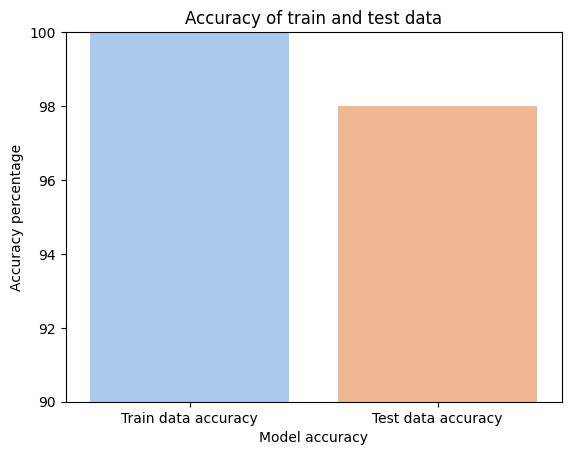

In [30]:
sns.barplot(y=[training_data_accuracy*100,test_data_accuracy*100],x=['Train data accuracy','Test data accuracy'],palette='pastel')
plt.title("Accuracy of train and test data")
plt.ylim(90,100)
plt.xlabel("Model accuracy")
plt.ylabel("Accuracy percentage")
plt.show()

In [31]:
print(confusion_matrix(y_test,y_test_pred))

[[94  1]
 [ 1  4]]


#CLASSIFICATION REPORT

In [32]:
print("Classification report:\n",classification_report(y_test,y_test_pred))

Classification report:
               precision    recall  f1-score   support

         0.0       0.99      0.99      0.99        95
         1.0       0.80      0.80      0.80         5

    accuracy                           0.98       100
   macro avg       0.89      0.89      0.89       100
weighted avg       0.98      0.98      0.98       100

